In [10]:
import pandas as pd

# Load the datasets
assembly_manifest = pd.read_csv('data/assembly.csv')
future_carrier_orders = pd.read_csv('data/carrier_order.csv')
failed_inspections = pd.read_csv('data/failed_inspections.csv', encoding='latin1')



In [12]:
# Analyze failed inspections to identify common components or failure modes
failed_part_counts = failed_inspections['Part Failed'].value_counts()


In [14]:
# Merge the datasets on 'Registration'
combined_data = pd.merge(assembly_manifest, failed_inspections, on='Registration', how='inner')


In [15]:
# Count the number of failed inspections per carrier
carrier_impact = combined_data['Carrier'].value_counts()


In [25]:
# Before merging, ensure that the 'Order Value' is a numeric value for analysis
future_carrier_orders['Order Value'] = future_carrier_orders['Order Value'].replace('[\$,]', '', regex=True).astype(float)

# Merge the datasets on 'Carrier'
final_combined_data = pd.merge(combined_data, future_carrier_orders, on='Carrier', how='inner')

# Now, we can analyze the financial impact by carrier due to failed parts
financial_impact = final_combined_data.groupby('Carrier')['Order Value'].sum()
print(financial_impact)


Carrier
Brazil Air           7.763700e+10
Crescent Airways     1.524000e+11
Fly ME               3.399864e+11
Go There Aiways      4.060800e+10
Kiwi Air             7.458700e+10
Pan Asia Airlines    1.408080e+11
Paragon Airlines     5.661530e+11
Royal Airline        3.650400e+11
Silver Jet           1.755000e+10
Toho Airlines        6.468900e+10
US Flyer             4.051440e+11
Name: Order Value, dtype: float64


In [24]:
# Group by 'Part Failed' and 'Supplier Location' to identify if certain parts and locations are more prone to failure
part_supplier_failure = combined_data.groupby(['Part Failed', 'Supplier Location']).size().reset_index(name='Count')

# Sort to see the most common failures
part_supplier_failure_sorted = part_supplier_failure.sort_values(by='Count', ascending=False)
print(part_supplier_failure_sorted.head(10))


               Part Failed Supplier Location  Count
8       Cargo access doors               USA    127
5       Cargo access doors             Japan    115
35  Horizontal stabilizers               USA     51
4       Cargo access doors             Italy     46
1       Cargo access doors            Canada     46
32  Horizontal stabilizers             Japan     45
80                Tail fin               USA     34
2       Cargo access doors           England     34
77                Tail fin             Japan     30
0       Cargo access doors         Australia     23


In [32]:
# Ensure 'Order Value' is cleaned and converted to a numeric type for summing
future_carrier_orders['Order Value'] = future_carrier_orders['Order Value'].replace('[\$,]', '', regex=True).astype(float)

# Merge the combined_data with future_carrier_orders
final_combined_data = pd.merge(combined_data, future_carrier_orders, on=['Carrier', 'Variant'], how='left')
# print(final_combined_data.head())


In [33]:
# Group by 'Carrier' and aggregate the necessary columns
carrier_pain_points = final_combined_data.groupby('Carrier').agg({'Part Failed': 'count', 'Order Value': 'sum'}).rename(columns={'Part Failed': 'Failed Inspections'})
print(carrier_pain_points)

                   Failed Inspections   Order Value
Carrier                                            
Brazil Air                         60  3.190180e+10
Crescent Airways                   80  2.383680e+10
Fly ME                            340  1.540344e+11
Go There Aiways                    40  2.030400e+10
Kiwi Air                           20  3.510000e+10
Pan Asia Airlines                 160  5.214300e+10
Paragon Airlines                  140  1.884930e+11
Royal Airline                     260  0.000000e+00
Silver Jet                         20  1.755000e+10
Toho Airlines                      20  3.384000e+10
US Flyer                          160  0.000000e+00


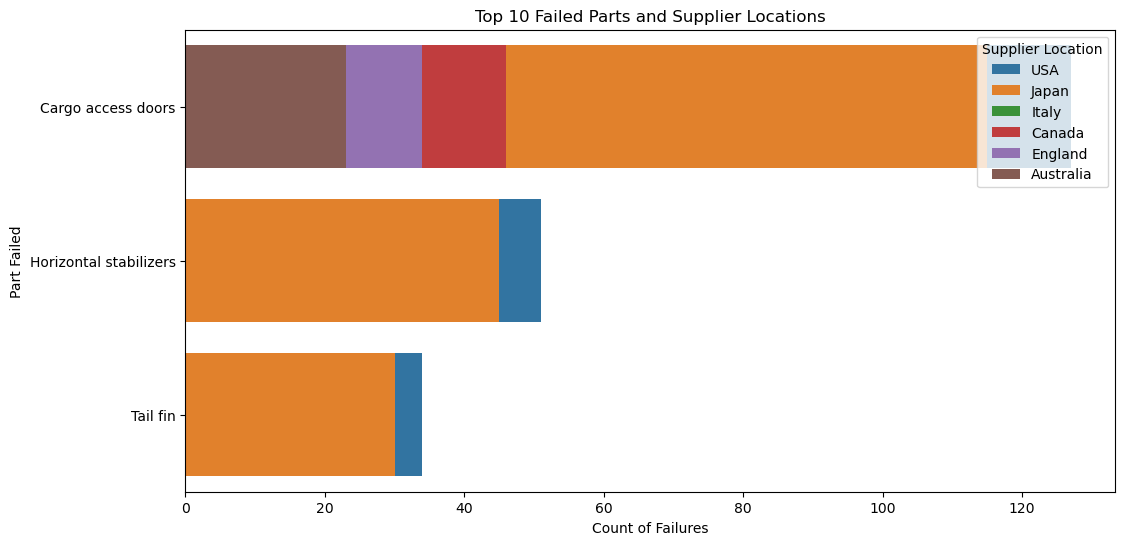

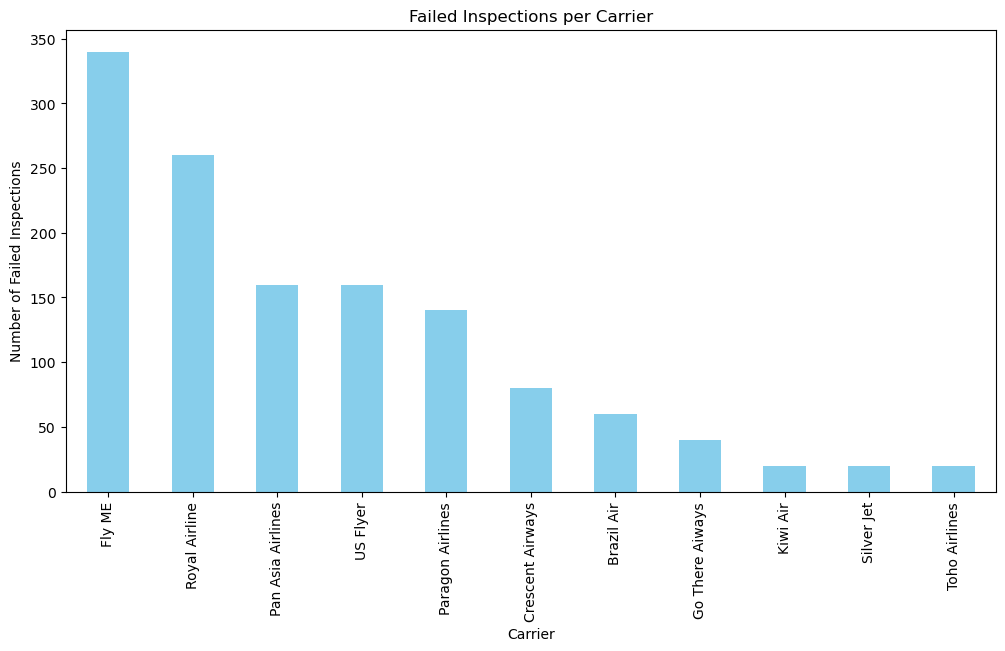

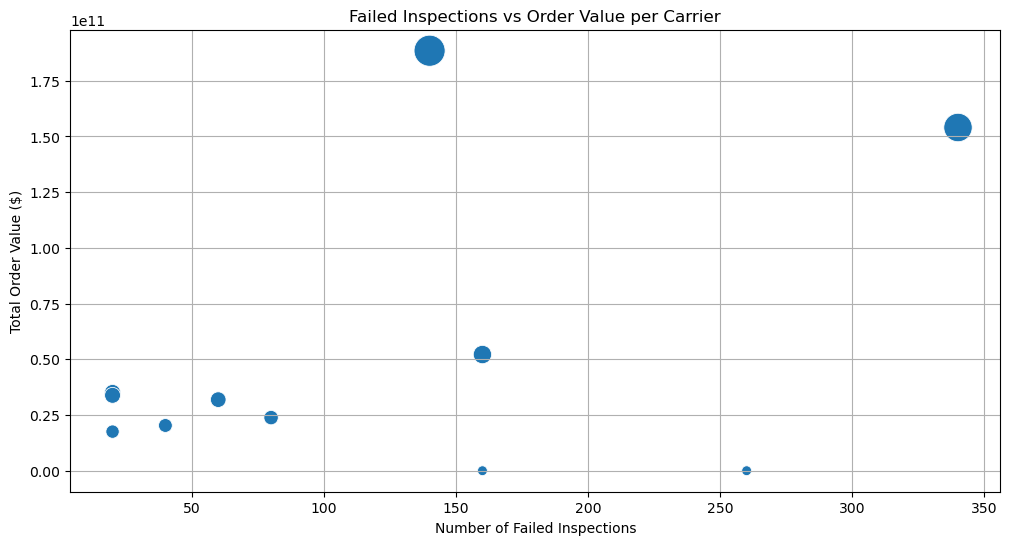

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming part_supplier_failure_sorted and carrier_pain_points are already defined as in your snippets.

# Visualization for Part and Supplier Failure Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Part Failed', data=part_supplier_failure_sorted.head(10), hue='Supplier Location', dodge=False)
plt.title('Top 10 Failed Parts and Supplier Locations')
plt.xlabel('Count of Failures')
plt.ylabel('Part Failed')
plt.legend(title='Supplier Location')
plt.show()

# Visualization for Carrier Pain Points
carrier_pain_points_sorted = carrier_pain_points.sort_values('Failed Inspections', ascending=False)
plt.figure(figsize=(12, 6))
carrier_pain_points_sorted['Failed Inspections'].plot(kind='bar', color='skyblue')
plt.title('Failed Inspections per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Failed Inspections')
plt.show()

# For the scatter plot to show the relationship between the number of failed inspections and the order value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=carrier_pain_points, x='Failed Inspections', y='Order Value', size='Order Value', legend=False, sizes=(50, 500))
plt.title('Failed Inspections vs Order Value per Carrier')
plt.xlabel('Number of Failed Inspections')
plt.ylabel('Total Order Value ($)')
plt.grid(True)
plt.show()
